### Import necessary libraries

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Load the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_set = {
    'images': train_images,
    'labels': train_labels
}

test_set = {
    'images': test_images,
    'labels': test_labels
}

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration

In [5]:
print('Size of the training set: ', {len(train_set['images'])})
print('Size of the testing set: ', {len(test_set['images'])})
print('Image resolution of images: ', train_set['images'][0].shape)
print('Largest pixel value in dataset: ', np.amax(train_set['images']))

Size of the training set:  {60000}
Size of the testing set:  {10000}
Image resolution of images:  (28, 28)
Largest pixel value in dataset:  255


### Data Pre-processing

In [6]:
# Normalize the pixel values
train_set['images'] = train_set['images'] / 255
test_set['images'] = test_set['images'] / 255

In [7]:
# Apply one-hot encoding to the labels
train_set['labels'] = tf.keras.utils.to_categorical(train_set['labels'], num_classes=10)
test_set['labels'] = tf.keras.utils.to_categorical(test_set['labels'], num_classes=10)

In [8]:
print('Shape of training set labels: ', train_set['labels'].shape)
print('Shape of testing set labels: ', test_set['labels'].shape)

Shape of training set labels:  (60000, 10)
Shape of testing set labels:  (10000, 10)


### Data Visualiztion

In [9]:
def visualize_img(ax, img, title): 
    ax.imshow(img, cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(title)

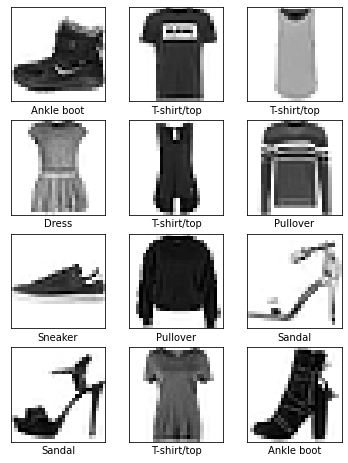

<Figure size 432x288 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(6, 8))

for i in range(12):
    img = train_set['images'][i]
    title = class_names[np.argmax(train_set['labels'][i])]
    visualize_img(axes[i // 3, i % 3], img, title)

plt.show()
plt.tight_layout()

### Training Data Preparation

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_set['images'], train_set['labels'], test_size=0.2, random_state=32)
X_train = X_train[:,:,:]
X_val = X_val[:,:,:]

In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000, 10)
(12000, 10)


### Build, Train, and Validate RNN Model

In [13]:
from tensorflow.keras import datasets, layers, models

rnn_model = models.Sequential()
rnn_model.add(layers.LSTM(128, input_shape=[None, 28]))
rnn_model.add(layers.Dense(10, activation = 'softmax'))

Metal device set to: Apple M1


2022-02-26 21:44:20.655624: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-26 21:44:20.655891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
rnn_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               80384     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


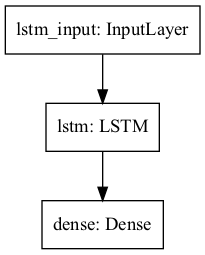

In [15]:
rnn_model.summary()
plot_model(rnn_model)

In [16]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=8, validation_data = (X_val, y_val))

2022-02-26 21:44:24.801676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-26 21:44:24.806468: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/8


2022-02-26 21:44:25.227072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-26 21:44:25.286791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-26 21:44:26.007805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.6715 - accuracy: 0.7561

2022-02-26 21:44:47.862165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-26 21:44:47.885353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 25s 15ms/step - loss: 0.6711 - accuracy: 0.7564 - val_loss: 0.4781 - val_accuracy: 0.8298
Epoch 2/8
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4469 - accuracy: 0.8360 - val_loss: 0.4034 - val_accuracy: 0.8546
Epoch 3/8
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3928 - accuracy: 0.8558 - val_loss: 0.3800 - val_accuracy: 0.8615
Epoch 4/8
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3606 - accuracy: 0.8682 - val_loss: 0.3572 - val_accuracy: 0.8664
Epoch 5/8
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3368 - accuracy: 0.8763 - val_loss: 0.3411 - val_accuracy: 0.8742
Epoch 6/8
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3166 - accuracy: 0.8828 - val_loss: 0.3308 - val_accuracy: 0.8792
Epoch 7/8
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2996 - accuracy: 0.8875 - val_loss: 0.3130 - val_accuracy: 0.

### Test and evaluate the model

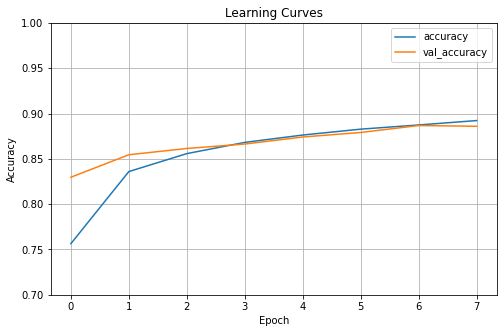

In [17]:
df_accuracy = pd.DataFrame(rnn_history.history)
df_accuracy = df_accuracy.drop(columns=['loss', 'val_loss'])
df_accuracy.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.7,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.show()

In [18]:
X_test = test_set['images'][:,:,:]
y_test = test_set['labels']

In [19]:
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_accuracy)

  7/313 [..............................] - ETA: 2s - loss: 0.3329 - accuracy: 0.8973 

2022-02-26 21:47:40.705530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-26 21:47:40.735477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.3445 - accuracy: 0.8751
Test Loss:  0.34452369809150696
Test Accuracy:  0.8751000165939331


In [20]:
def visualize_chart(ax, proba, actual): 
    x = np.arange(10)
    mask_pred = np.argmax(proba)
    mask_actual = np.argmax(actual)
    mask_rest = np.delete(x, np.maximum(mask_pred, mask_actual))
    mask_rest = np.delete(mask_rest, np.minimum(mask_pred, mask_actual))
    
    ax.bar(x[mask_pred], proba[mask_pred], color='blue')
    ax.bar(x[mask_actual], proba[mask_actual], color='green')
    ax.bar(x[mask_rest], proba[mask_rest], color='grey')
    ax.set_xticks(x)
    ax.set_yticks([])
    ax.set_ylim(0, 1)

In [21]:
X_test_sample = X_test[33:37, :, :]
y_proba_sample = rnn_model.predict(X_test_sample)
y_actual_sample = y_test[33:37, :]

2022-02-26 21:47:45.928152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-26 21:47:45.946018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


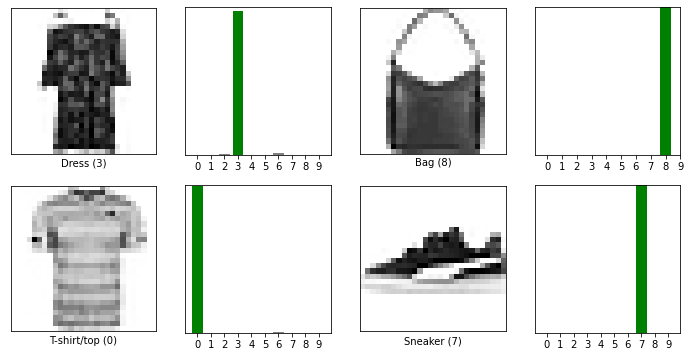

<Figure size 432x288 with 0 Axes>

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i in range(4):
    img = X_test_sample[i]
    proba = y_proba_sample[i]
    actual = y_actual_sample[i]
    title = f'{class_names[np.argmax(y_actual_sample[i])]} ({np.argmax(y_actual_sample[i])})'
    visualize_img(axes[2*i // 4, 2*i % 4], img, title)
    visualize_chart(axes[2*i // 4, 2*i % 4 + 1], proba, actual)

plt.show()
plt.tight_layout()

[[804   3  22  27   4   1 124   1  14   0]
 [  5 966   2  20   3   0   3   0   1   0]
 [  7   0 767  12  97   0 115   0   2   0]
 [ 19   5  21 893  31   0  27   0   4   0]
 [  0   1  81  36 784   1  93   0   4   0]
 [  0   0   0   2   0 959   0  26   1  12]
 [119   5  57  30  47   0 725   0  17   0]
 [  0   0   0   0   0  10   0 985   0   5]
 [  4   0   5   3   3   2   1   7 975   0]
 [  1   0   0   1   0   6   0  99   0 893]]


<AxesSubplot:>

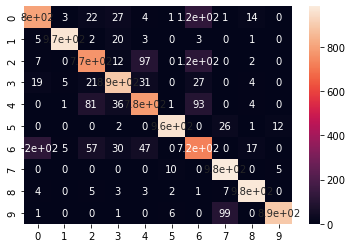

In [23]:
y_test_classes = np.argmax(y_test, axis=1)
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)